In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
train_data_dir = "/content/drive/My Drive/Dataset/train"
test_data_dir = "/content/drive/My Drive/Dataset/test"

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)


val_datagen = ImageDataGenerator(rescale=1./255)


batch_size = 32


train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True
)


validation_generator = val_datagen.flow_from_directory(
    test_data_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)


base_model = DenseNet121(weights='imagenet', include_top=False)


x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=predictions)


for layer in base_model.layers:
    layer.trainable = False


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=5,
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
)

Found 3402 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
107/107 ━━━━━━━━━━━━━━━━━━━━ 750s 7s/step - accuracy: 0.8328 - loss: 0.3596 - val_accuracy: 0.9700 - val_loss: 0.0816
Epoch 2/5
107/107 ━━━━━━━━━━━━━━━━━━━━ 54s 505ms/step - accuracy: 0.9292 - loss: 0.1980 - val_accuracy: 0.9600 - val_loss: 0.0943
Epoch 3/5
107/107 ━━━━━━━━━━━━━━━━━━━━ 81s 491ms/step - accuracy: 0.9436 - loss: 0.1519 - val_accuracy: 0.9400 - val_loss: 0.1621
Epoch 4/5
107/107 ━━━━━━━━━━━━━━━━━━━━ 83s 500ms/step - accuracy: 0.9380 - loss: 0.1619 - val_accuracy: 0.9350 - val_loss: 0.1594
Epoch 5/5
107/107 ━━━━━━━━━━━━━━━━━━━━ 53s 492ms/step - accuracy: 0.9440 - loss: 0.1683 - val_accuracy: 0.9300 - val_loss: 0.1865


In [ ]:
model.save('/content/drive/My Drive/Dataset/dense.h5')

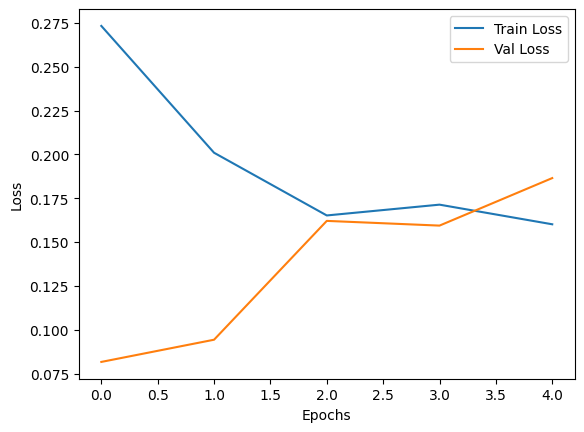

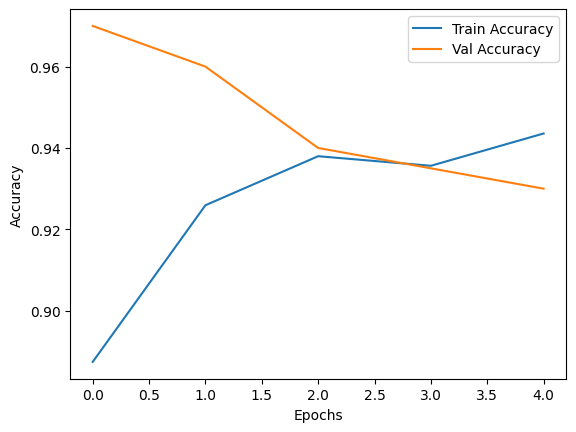

7/7 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step
              precision    recall  f1-score   support

      NORMAL       0.88      1.00      0.93       100
   PNEUMONIA       1.00      0.86      0.92       100

    accuracy                           0.93       200
   macro avg       0.94      0.93      0.93       200
weighted avg       0.94      0.93      0.93       200



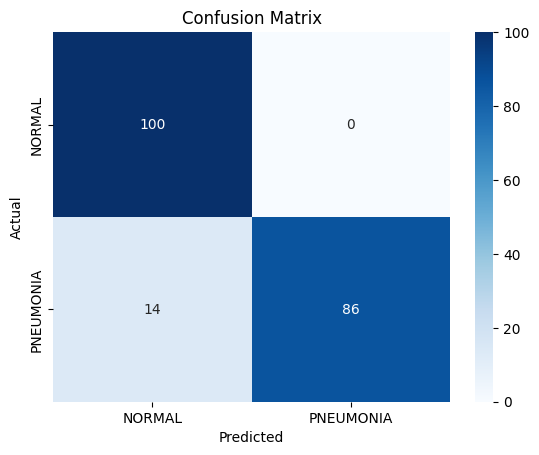

In [ ]:

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


y_true = validation_generator.classes

y_true = validation_generator.classes
y_pred_prob = model.predict(validation_generator)
y_pred = y_pred_prob > 0.5


report = classification_report(y_true, y_pred, target_names=['NORMAL', 'PNEUMONIA'])
print(report)

import seaborn as sns


confusion_mat = confusion_matrix(y_true, y_pred)

sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=['NORMAL', 'PNEUMONIA'],
            yticklabels=['NORMAL', 'PNEUMONIA'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()